In [2]:
# Import the necessary Libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
# Set plot style as ggplot
plt.style.use('ggplot')

In [14]:
# Question 1.1
# Read in CSV files
dataframe_jan = pd.read_csv("raw-january.csv")
dataframe_jun = pd.read_csv("raw-june.csv")
# Create empty arrays to hold duration for each trip in January and June
duration_jan = []
duration_jun = []
# Iterate through the Dataframe of January and June and calculate duration for each entry
for index, row in dataframe_jan.iterrows():
    duration_jan.append((pd.to_datetime(row.dropoff_datetime, dayfirst='true') - pd.to_datetime(row.pickup_datetime, dayfirst='true')).seconds/60)
for index, row in dataframe_jun.iterrows():
    duration_jun.append((pd.to_datetime(row.dropoff_datetime, dayfirst='true') - pd.to_datetime(row.pickup_datetime, dayfirst='true')).seconds/60)

# Add Duration to their respective DataFrames
dataframe_jan['duration'] = pd.Series(duration_jan)
dataframe_jun['duration'] = pd.Series(duration_jun)

# Remove the pickup datetime and dropoff datetime
dataframe_jan.drop('pickup_datetime', axis=1, inplace=True)
dataframe_jan.drop('dropoff_datetime', axis=1, inplace=True)
dataframe_jun.drop('pickup_datetime', axis=1, inplace=True)
dataframe_jun.drop('dropoff_datetime', axis=1, inplace=True)

In [14]:
#Answer to 1.2
# Print the title and stars
print("{0} DURATION{0}".format('*'*28))
# Calculate and print the means for each month
# Round to ~3 decimal places (duration is in minutes so having more precision than seconds is not as useful for calculating
# fares, etc.)
print("{:>10}".format("January: "), "{:.5}".format(dataframe_jan["duration"].mean()))
print("{:>10}".format("June: "), "{:.5}".format(dataframe_jun["duration"].mean()))
print("{0} DISTANCE {0}".format('*'*28))
# Likewise, having distance more precise than an inch is not as useful
print("{:>10}".format("January: "), "{:.4}".format(dataframe_jan["trip_distance"].mean()))
print("{:>10}".format("June: "), "{:.4}".format(dataframe_jun["trip_distance"].mean()))
print("{0} PASSENGERS {0}".format('*'*27))

print("{:>10}".format("January: "), "{:.4}".format(dataframe_jan["passenger_count"].mean()))
print("{:>10}".format("June: "), "{:.4}".format(dataframe_jun["passenger_count"].mean()))
print('*'*66)


**************************** DURATION****************************
 January:  14.905
    June:  17.002
**************************** DISTANCE ****************************
 January:  2.883
    June:  3.047
*************************** PASSENGERS ***************************
 January:  1.669
    June:  1.658
******************************************************************


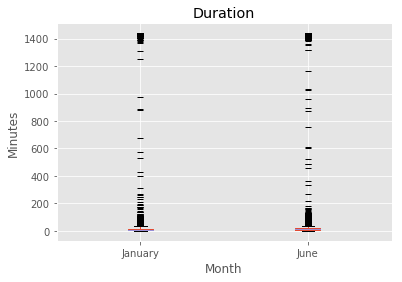

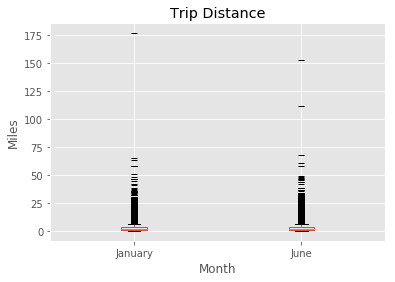

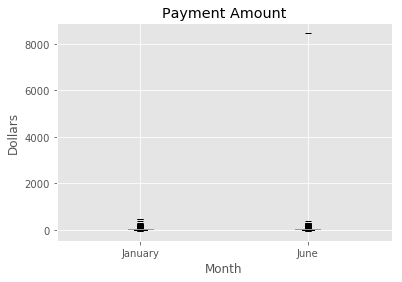

In [14]:
#Answer to 1.3
# Create a dataframe with the two columns to plot
duration = pd.DataFrame({'January':dataframe_jan['duration'],'June':dataframe_jun['duration']}, columns=['January', 'June'])
# Create a boxplot, using underscore as a symbol
duration.plot(kind='box', sym='_')
# Label the plot
plt.title('Duration')
plt.xlabel('Month')
plt.ylabel('Minutes')
plt.show()

# Repeat the process but for trip_distance and payment_amount
trip_distance = pd.DataFrame({'January':dataframe_jan['trip_distance'],'June':dataframe_jun['trip_distance']}, columns=['January', 'June'])
trip_distance.plot(kind='box', sym='_')
plt.title('Trip Distance')
plt.xlabel('Month')
plt.ylabel('Miles')
plt.show()

payment_amount = pd.DataFrame({'January':dataframe_jan['payment_amount'],'June':dataframe_jun['payment_amount']}, columns=['January', 'June'])
payment_amount.plot(kind='box', sym='_')
plt.title('Payment Amount')
plt.xlabel('Month')
plt.ylabel('Dollars')
plt.show()


In [19]:
#Answer to 1.4
'''
Duration: [1, 60]
The maximum I would select for the range of duration would be at about 1 hours, or around 60 minutes. 
Given that the average for January and June is approximately 15 minutes and 17 minutes respectively, the typical taxi drive 
should not take beyond this limit. This is also due in part to the fact that typically a car trip beyond this limit would be 
fairly expensive for the average taxi passenger, and many passengers are usually within an hour of their destination.
The New York Taxi commission states Westchester, Nassau Counties, and Newark (airport) as the furthest typical destinations from
Manhattan, with Nassau County being approximately 45 minutes away (Google Maps). With bad traffic conditions, this could
increase the time to 60 minutes.
The minimum could be around 0 minutes, given that the population density in New York is relatively high, and a trip down a few 
streetsis not unusual. 

Trip Distance: [0.5, 30]
In this case, it depends on the city and how densely packed the population is. In New York's case, the population is densely
packed - with the average speed (assuming the car travels an average speed of ~14km/h (or 8.51 mph)
https://chartingtransport.com/2010/10/31/trends-in-melbourne-traffic/) in New York City is quite low. As stated as before,
the longest distance typically taken by a passenger in New York is Nassau County - approximately 30 miles away. This is also
the distance from Manhattan to Newark Airport and back - not an unusual use case for a taxi ride.
I would limit the minimum distance to around 0.5 miles, as a typical person can walk this distance within 10 minutes, and would
most likely not justify a taxi cab ride.

Passenger Count: [1, 4]
This case is fairly straightforward. A typical cab only has spaces for 4 passengers. If this data set only contains sedans, then 
this would be the limit. This includes Taxi Vans - as the official Taxi van of New York - the Nissan NV200 only has 5 seats 
(one for the driver. (http://www.nissancommercialvehicles.com/nv200-taxi)). This, as well as the fact that the New York 
Commission states that it is illegal to have more than 4 passengers in any given taxi cab 
(http://www.nyc.gov/html/tlc/html/faq/faq_pass.shtml#3) means that
the maximum of this range should be 4. Considering that this is entered by a human there is a higher possibility for mistakes,
so the 8% of noisy values is not unusual.

Payment Amount: [1, 100]
Given that the maximum distance is about 30 miles, putting this distance (Manhattan to Long Island) into a taxi fare calculator 
returns the cost for a ride could be around 100$:
(https://www.taxifarefinder.com/main.php?city=NY&from=Manhattan%2C+New+York%2C+NY%2C+United+States&to=Nassau+County%2C+NY%2C+United+States&fromCoord=40.7830603,-73.97124880000001&toCoord=40.6546145,-73.55941280000002)

'''
#1.4: 2
# Select every value in dataframe_jan that is outside the range and find the count
ratio_dur = dataframe_jan['duration'][1 > dataframe_jan['duration']].count()
ratio_dur += dataframe_jan['duration'][60 < dataframe_jan['duration']].count()
# Get the ratio
ratio_dur /= (dataframe_jan['duration'].count())
# Print output
print("*"*85)
print("{0:.3}% of instances in '{1}' are noisy! (normal range is between {2} and {3})".format(ratio_dur*100, 'duration', 1, 60))
print("*"*85)

# Repeat process with distance, passenger count and payment amount

ratio_dist = dataframe_jan['trip_distance'][0.5 > dataframe_jan['trip_distance']].count()
ratio_dist += dataframe_jan['trip_distance'][30 < dataframe_jan['trip_distance']].count()
ratio_dist /= (dataframe_jan['trip_distance'].count())
print("{0:.3}% of instances in '{1}' are noisy! (normal range is between {2} and {3})".format(ratio_dist*100, 'trip_distance', 0.5, 30))
print("*"*85)
ratio_passenger_count = dataframe_jan['passenger_count'][1 > dataframe_jan['passenger_count']].count()
ratio_passenger_count += dataframe_jan['passenger_count'][4 < dataframe_jan['passenger_count']].count()
ratio_passenger_count /= (dataframe_jan['passenger_count'].count())
print("{0:.3}% of instances in '{1}' are noisy! (normal range is between {2} and {3})".format(ratio_passenger_count*100, 'passenger_count', 1,4))
print("*"*85)
ratio_payment_amount = dataframe_jan['payment_amount'][1 > dataframe_jan['payment_amount']].count()
ratio_payment_amount += dataframe_jan['payment_amount'][100 < dataframe_jan['payment_amount']].count()
ratio_payment_amount /= (dataframe_jan['payment_amount'].count())
print("{0:.3}% of instances in '{1}' are noisy! (normal range is between {2} and {3})".format(ratio_payment_amount*100, 'payment_amount', 1, 100))
print("*"*85)

#1.4: 3
'''Code for replacing noisy values with the mean
for col in dataframe:
    mean = dataframe[col].mean()
    arr = []
    lower_lim = input("Enter lower lim:")
    higher_lim = input("Enter higher lim:")
    for value in dataframe[col]:
        if value < lower_lim or value > higher_lim:
            arr.append(mean)
        else:
            arr.append(value)
    dataframe[col] = pd.Series(arr)'''

*************************************************************************************
1.2% of instances in 'duration' are noisy! (normal range is between 1 and 60)
*************************************************************************************
4.65% of instances in 'trip_distance' are noisy! (normal range is between 0.5 and 30)
*************************************************************************************
8.84% of instances in 'passenger_count' are noisy! (normal range is between 1 and 4)
*************************************************************************************
0.215% of instances in 'payment_amount' are noisy! (normal range is between 1 and 100)
*************************************************************************************


'Code for replacing noisy values with the mean\nfor col in dataframe:\n    mean = dataframe[col].mean()\n    arr = []\n    lower_lim = input("Enter lower lim:")\n    higher_lim = input("Enter higher lim:")\n    for value in dataframe[col]:\n        if value < lower_lim or value > higher_lim:\n            arr.append(mean)\n        else:\n            arr.append(value)\n    dataframe[col] = pd.Series(arr)'

In [11]:
#Answer to 2.1
# Import Libraries (allows part 2 to be run separately from part 1)
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Read in CSV
dataframe2 = pd.read_csv("clean-january.csv")

# Create new array to hold isWeekend values
isWeekend = []
# Define weekend (sunday/saturday)

# Iterate through data frame, if weekend then record it as 1 in isWeekend
for index, row in dataframe2.iterrows():
    if pd.to_datetime(row['pickup_datetime'], dayfirst=True).weekday() >= 5:
        isWeekend.append(1)
    else:
        isWeekend.append(0)

# Add isWeekend to DataFrame
dataframe2['isWeekend'] = pd.Series(isWeekend)

# Count the number of entries on weekends
percentage = dataframe2['isWeekend'][1 == dataframe2['isWeekend']].count()
# Find the ratio of weekends over total
percentage /= dataframe2['isWeekend'].count()
# Print Output
print("*"*67)
# Format to 3 places (3 sigfigs is enough precision))
print('% of weekend trips={0:.3}'.format(percentage*100))
print("*"*67)

*******************************************************************
% of weekend trips=29.1
*******************************************************************


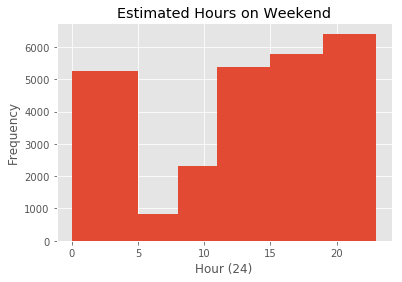

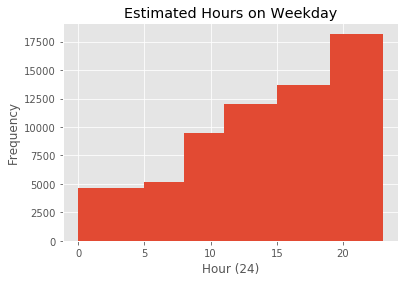

In [12]:
#Answer to 2.2
# Create a new array to hold hours
hour = []

# Iterate through rows and append the hour of the pickup time
for index, row in dataframe2.iterrows():
    hour.append(pd.to_datetime(row.pickup_datetime, dayfirst=True).hour)

# Append hour to DataFrame
dataframe2['hour'] = pd.Series(hour)

# Create a new Series where isWeekend is true
weekend = dataframe2.hour[dataframe2.isWeekend == 1]
# Histogram plot this.
weekend.hist(bins=[0, 5, 8, 11, 15, 19, 23])
# Label the plot
plt.title('Estimated Hours on Weekend')
plt.xlabel('Hour (24)')
plt.ylabel('Frequency')
plt.show()

# Repeat above process with weekdays
weekday = dataframe2.hour[dataframe2.isWeekend == 0]
weekday.hist(bins = [0, 5, 8, 11, 15, 19, 23])
plt.title('Estimated Hours on Weekday')
plt.xlabel('Hour (24)')
plt.ylabel('Frequency')
plt.show()

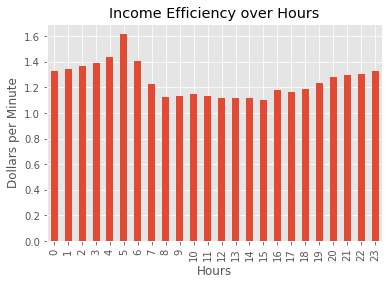

In [6]:
#Answer to 2.3
# Create a new array income efficiency
income_efficiency = []

# Iterate through rows and calculate the income efficiency
for index, row in dataframe2.iterrows():
    income_efficiency.append(row['payment_amount']/row['duration'])

# Append income efficiency into DataFrame 2
dataframe2['income_efficiency'] = pd.Series(income_efficiency)

# Group income efficiency by 24h format - and calculate the mean income efficiency for that hour
data = dataframe2.groupby(by=['hour'])['income_efficiency'].mean()
# Plot this in a bar graph
data.plot(kind='bar')
# Label the plot
plt.title('Income Efficiency over Hours')
plt.xlabel('Hours')
plt.ylabel('Dollars per Minute')
plt.show()